MEMBROS DO GRUPO: ALLAN BRUNO FAE, MARCIO PINHEIRO MENDES, RAFAEL ANTUNES COSTA

O trabalho do 1º bimestre será sobre implementação das buscas cegas para determinar a rota entre duas cidades do ES.

O usuário deve escolher uma cidade como origem, o nome da cidade destino e qual busca vai ser realizada: Profundidade ou Largura.

Ao rodar o código deve ser apresentado como saída os nomes das cidades visitadas de acordo com o algoritmo de busca cega escolhido.



Mais informações:

1) Número máximo de componentes: 3.

2) Implementação preferencialmente em Python mas podem utilizar outra linguagem fazendo a justificativa no arquivo do trabalho.

3) A entrega deve ser um notebook do Google Colab com a descrição do trabalho, o código e os testes realizados.

4) O mapa deve ter no mínimo 14 cidades do ES.





Valor: 1,5 ponto ( incluindo participação no laboratório)



Dica: Para evitar que o código entre em loop use um atributo booleano para marcar a cidade como visitada.

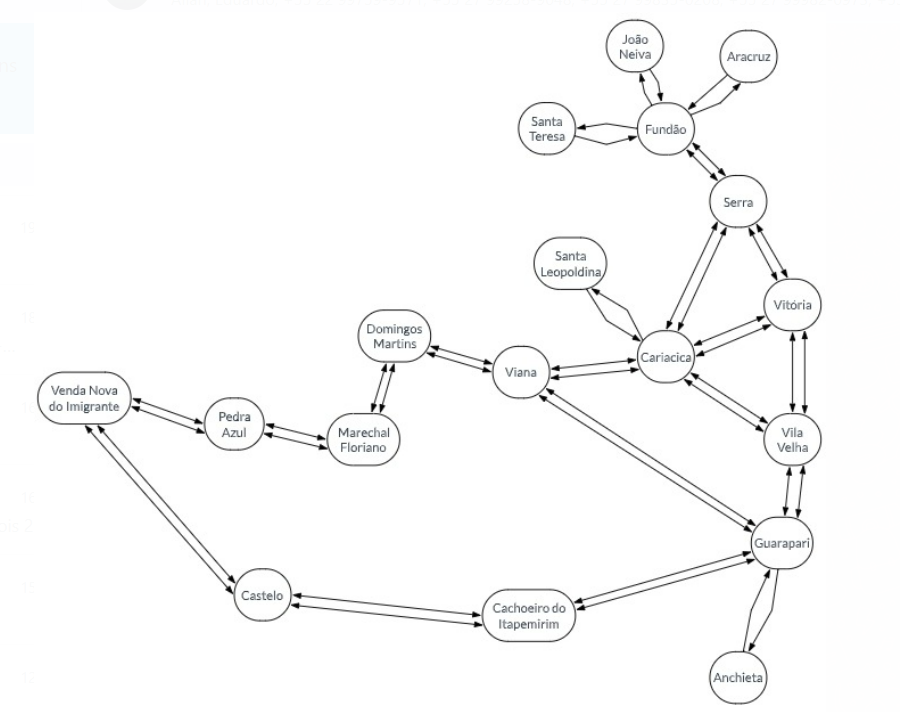

In [4]:
# IMPLEMENTAÇÃO DAS CLASSES
class Cidade:
    def __init__(self, nome, *vizinhos):
        self.nome = nome
        self.vizinhos = list(vizinhos)
        self.proximo = None


class Fila:
    """Essa classe implementa uma fila utilizando uma lista. Utilizamos
    dois ponteiros, um para indicar o primeiro elemento da fila e outro
    para indicar o ultimo elemento"""

    def __init__(self):
        self.conjunto = []
        self.primeiro = None
        self.ultimo = None

    def inserir_elemento(self, elemento):
        """Insere um elemento na fila.
        Trata os casos da fila estar vazia e da fila ja conter elementos."""
        if len(self.conjunto) == 0:
            self.conjunto.append(elemento)
            self.primeiro = elemento
            self.ultimo = elemento
        else:
            self.conjunto.append(elemento)
            self.ultimo.proximo = elemento
            self.ultimo = elemento

    def remover_elemento(self):
        """Remove o primeiro elemento da fila"""
        if len(self.conjunto) != 0:
            self.primeiro = self.primeiro.proximo
            first = self.conjunto.pop(0)
            return first


class Pilha:
    """Essa classe implementa uma estrutura do tipo pilha utilizando listas.
    O ultimo elemento da lista representa o topo da pilha."""
    def __init__(self):
        self.conjunto = []
        self.primeiro = None  # ponteiro que aponta pro ultimo elemento da lista
        self.segundo = None   # ponteiro que aponta pro penultimo elemento da lista

    def inserir_elemento(self, elemento):
        """Insere um objeto na pilha.
        Trata os casos da pilha estar vazia e da pilha ja conter elementos."""
        if len(self.conjunto) == 0:
            self.conjunto.append(elemento)
            self.primeiro = elemento
            self.segundo = elemento
        else:
            self.segundo = self.conjunto[-1]
            self.conjunto.append(elemento)
            self.primeiro = self.conjunto[-1]

    def remover_elemento(self):
        """Remove o elemento do topo da pilha. Na nossa implementacao, o topo
        da pilha eh o final da lista"""
        if len(self.conjunto) == 1:
            top = self.conjunto.pop()
            return top
        elif len(self.conjunto) == 2:
            self.primeiro = self.conjunto[0]
            top = self.conjunto.pop()
            self.segundo = self.conjunto[0]
            return top
        else:
            self.primeiro = self.conjunto[-2]
            top = self.conjunto.pop()
            self.segundo = self.conjunto[-2]
            return top


In [8]:
def trabalho():
    # cadastro das cidades e seus vizinhos
    cities = [{"codigo": 0, "nome": "Vila Velha", "cidade": Cidade('Vila Velha', ('Guarapari', 'Vitória', 'Cariacica'))},
            {'codigo': 1, 'nome': 'Vitoria', 'cidade': Cidade('Vitoria', ('Vila Velha', 'Cariacica', 'Serra'))},
            {'codigo': 2, 'nome': 'Serra', 'cidade': Cidade('Serra', ('Vitoria', 'Cariacica', 'Fundao'))},
            {'codigo': 3, 'nome': 'Cariacica', 'cidade': Cidade('Cariacica', ('Viana', 'Vitoria', 'Serra', 'Vila Velha',
                                                                                'Santa Leopoldina'))},
            {'codigo': 4, 'nome': 'Viana', 'cidade': Cidade('Viana', ('Cariacica', 'Guarapari', 'Domingos Martins'))},
            {'codigo': 5, 'nome': 'Guarapari', 'cidade': Cidade('Guarapari', ('Viana', 'Vila Velha', 'Anchieta',
                                                                                'Cachoeiro do Itapemirim'))},
            {'codigo': 6, 'nome': 'Fundao', 'cidade': Cidade('Fundao', ('Serra', 'Aracruz', 'Santa Teresa',
                                                                        'Joao Neiva'))},
            {'codigo': 7, 'nome': 'Domingos Martins', 'cidade': Cidade('Domingos Martins', ('Viana',
                                                                                            'Marechal Floriano'))},
            {'codigo': 8, 'nome': 'Marechal Floriano', 'cidade': Cidade('Marechal Floriano', ('Domingos Martins',
                                                                                                'Pedra Azul'))},
            {'codigo': 9, 'nome': 'Pedra Azul', 'cidade': Cidade('Pedra Azul', ('Marechal Floriano',
                                                                                'Venda Nova do Imigrante'))},
            {'codigo': 10, 'nome': 'Venda Nova do Imigrante', 'cidade': Cidade('Venda Nova do Imigrante', ('Pedra Azul',
                                                                                                            'Castelo'))},
            {'codigo': 11, 'nome': 'Castelo', 'cidade': Cidade('Castelo', ('Venda Nova do Imigrante',
                                                                            'Cachoeiro do Itapemirim'))},
            {'codigo': 12, 'nome': 'Santa Leopoldina', 'cidade': Cidade('Santa Leopoldina', ('Cariacica'))},
            {'codigo': 13, 'nome': 'Anchieta', 'cidade': Cidade('Anchieta', ('Guarapari'))},
            {'codigo': 14, 'nome': 'Cachoeiro do Itapemirim', 'cidade': Cidade('Cachoeiro do Itapemirim', ('Guarapari',
                                                                                                            'Castelo'))},
            {'codigo': 15, 'nome': 'Aracruz', 'cidade': Cidade('Aracruz', ('Fundao'))},
            {'codigo': 16, 'nome': 'Santa Teresa', 'cidade': Cidade('Santa Teresa', ('Fundao'))},
            {'codigo': 17, 'nome': 'Joao Neiva', 'cidade': Cidade('Joao Neiva', ('Fundao'))}]

    """ CONSIDERAMOS QUE CADA CIDADE FAZ FRONTEIRA COM AS OUTRAS CUJO VALOR NA MATRIZ EH IGUAL A 1.
    CONSIDERAMOS QUE UMA CIDADE NAO FAZ FRONTEIRA COM ELA MESMA (DIAGONAL PRINCIPAL = 0)"""
    fronteiras = [[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # vila velha 0
                [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # vitoria 1
                [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # serra 2
                [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # cariacica 3
                [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # viana 4
                [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  # guarapari 5
                [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],  # fundao 6
                [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # domingos martins 7
                [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # marechal floriano 8
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # pedra azul 9
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # venda nova 10
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # castelo 11
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # sta leopoldina 12
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # anchieta 13
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # cachoeiro 14
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # aracruz 15
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # sta teresa 16
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # joao neiva 17

    # estrutura para guardar as cidades visitadas no percurso
    visitadas = []

    # menu para o usuario escolher o tipo de busca
    while True:
        print('Opcao 1: Busca em largura (Filas) \n'
            'Opcao 2: Busca em profundidade (Pilhas)\n')
        try:
            tipo_busca = int(input('Digite a opcao desejada: '))
            break
        except ValueError:
            print('O valor digitado deve ser um numero inteiro.\n')

    # exibir as opções de cidades para o usuário
    for i, cidade in enumerate(cities):
        print(i, cidade['cidade'].nome)

    while True:
        try:
            origem = int(input("Digite o codigo da cidade de origem: "))
            destino = int(input("Digite o codigo da cidade de destino: "))
            break
        except ValueError:
            print('Codigo da origem e destino deve ser um numero inteiro.\n')

    if tipo_busca == 1:
        indice = origem
        fila = Fila()
        fila.inserir_elemento(cities[indice]['cidade'])
        while True:
            if indice == destino:
                visitadas.append(cities[indice]['cidade'].nome)
                print(f'O caminho percorrido foi: {[nome for nome in visitadas]}')
                break
            else:
                filhos = [i for i, fronteiras[indice][i] in enumerate(fronteiras[indice]) if fronteiras[indice][i] == 1]
                # ENFILEIRANDO OS FILHOS
                for filho in filhos:
                    if cities[filho]['nome'] in visitadas or cities[filho]['cidade'] in fila.conjunto:
                        continue
                    else:
                        fila.inserir_elemento(cities[filho]['cidade'])
                if len(fila.conjunto) > 0:
                    removido = fila.remover_elemento()
                    visitadas.append(removido.nome)
                else:
                    print('Nao foi possivel chegar ao destino')
                    break
                for cidade in cities:
                    if cidade['nome'] == fila.primeiro.nome:
                        indice = cidade['codigo']
                        break
    elif tipo_busca == 2:
        indice = origem
        pilha = Pilha()
        pilha.inserir_elemento(cities[indice]['cidade'])
        while True:
            if indice == destino:
                visitadas.append(cities[indice]['cidade'].nome)
                print(f'O caminho percorrido foi: {[cidade for cidade in visitadas]}')
                break
            else:
                filhos = [i for i, fronteiras[indice][i] in enumerate(fronteiras[indice]) if fronteiras[indice][i] == 1]
                if len(pilha.conjunto) > 0:
                    removido = pilha.remover_elemento()
                    visitadas.append(removido.nome)
                else:
                    print('Nao foi possivel chegar ao destino')
                    break
                # EMPILHANDO OS FILHOS
                for filho in filhos:
                    if cities[filho]['nome'] in visitadas or cities[filho]['cidade'] in pilha.conjunto:
                        continue
                    else:
                        pilha.inserir_elemento(cities[filho]['cidade'])
                for cidade in cities:
                    if cidade['nome'] == pilha.primeiro.nome:
                        indice = cidade['codigo']
                        break
    else:
        print('Opcao invalida')


BUSCA EM LARGURA

In [9]:
trabalho()

Opcao 1: Busca em largura (Filas) 
Opcao 2: Busca em profundidade (Pilhas)

Digite a opcao desejada: 1
0 Vila Velha
1 Vitoria
2 Serra
3 Cariacica
4 Viana
5 Guarapari
6 Fundao
7 Domingos Martins
8 Marechal Floriano
9 Pedra Azul
10 Venda Nova do Imigrante
11 Castelo
12 Santa Leopoldina
13 Anchieta
14 Cachoeiro do Itapemirim
15 Aracruz
16 Santa Teresa
17 Joao Neiva
Digite o codigo da cidade de origem: 0
Digite o codigo da cidade de destino: 8
O caminho percorrido foi: ['Vila Velha', 'Vitoria', 'Cariacica', 'Guarapari', 'Serra', 'Viana', 'Santa Leopoldina', 'Anchieta', 'Cachoeiro do Itapemirim', 'Fundao', 'Domingos Martins', 'Castelo', 'Aracruz', 'Santa Teresa', 'Joao Neiva', 'Marechal Floriano']


BUSCA EM PROFUNDIDADE

In [10]:
trabalho()

Opcao 1: Busca em largura (Filas) 
Opcao 2: Busca em profundidade (Pilhas)

Digite a opcao desejada: 2
0 Vila Velha
1 Vitoria
2 Serra
3 Cariacica
4 Viana
5 Guarapari
6 Fundao
7 Domingos Martins
8 Marechal Floriano
9 Pedra Azul
10 Venda Nova do Imigrante
11 Castelo
12 Santa Leopoldina
13 Anchieta
14 Cachoeiro do Itapemirim
15 Aracruz
16 Santa Teresa
17 Joao Neiva
Digite o codigo da cidade de origem: 0
Digite o codigo da cidade de destino: 8
O caminho percorrido foi: ['Vila Velha', 'Guarapari', 'Cachoeiro do Itapemirim', 'Castelo', 'Venda Nova do Imigrante', 'Pedra Azul', 'Marechal Floriano']
